In [147]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle
import os

In [148]:
data=pd.read_csv('prediction.csv')

In [149]:
data.head()

,Unnamed: 0,area,prices
0,0,1000,316404.109589
1,1,1500,384297.945205
2,2,2300,492928.082192
3,3,3540,661304.794521
4,4,4120,740061.643836


In [150]:
data.columns

Index(['Unnamed: 0', 'area', 'prices'], dtype='object')

In [151]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [152]:
data

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [153]:
model=linear_model.LinearRegression()

In [154]:
model.fit(data[['area']],data.prices)

LinearRegression()

In [155]:
model.coef_

array([135.78767123])

In [156]:
model.intercept_

180616.4383561645

In [157]:
data.head(2)

,area,prices
0,1000,316404.109589
1,1500,384297.945205


In [158]:
model.predict([[3000]])

array([587979.45205479])

In [159]:
new_col=model.predict(data[['area']])

In [160]:
new_col

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [161]:
data['new_prices']=new_col

In [162]:
data.head()

,area,prices,new_prices
0,1000,316404.109589,316404.109589
1,1500,384297.945205,384297.945205
2,2300,492928.082192,492928.082192
3,3540,661304.794521,661304.794521
4,4120,740061.643836,740061.643836


In [163]:
import matplotlib.pyplot as plt

In [164]:
data.head()

,area,prices,new_prices
0,1000,316404.109589,316404.109589
1,1500,384297.945205,384297.945205
2,2300,492928.082192,492928.082192
3,3540,661304.794521,661304.794521
4,4120,740061.643836,740061.643836


Text(0, 0.5, 'Prices')

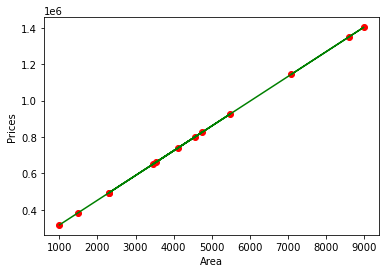

In [165]:
plt.plot(data['area'],data['prices'],color='green')
plt.scatter(data['area'],data['prices'],color='red')
plt.xlabel('Area')
plt.ylabel('Prices')

In [166]:
with open('newfile','wb') as f:
    pickle.dump(model,f)

In [167]:
with open('newfile','rb') as f:
    model=pickle.load(f)

In [168]:
model

LinearRegression()

In [169]:
model.predict([[3000]])

array([587979.45205479])